# Portfolio Optimisation - Notebook One: Data Exploration

This notebook contains:
1. Retrived historical stock data for our portfolio
2. Calculated daily returns
3. Explored basic statistics and correlations

This mirrored what I did in R with quantmod or tidyquant, but using Python's pandas and yfinance.

## 1.Libraries

 R = `library()` whereas Python = `import`.

In [29]:
# Packages
import pandas as pd
import numpy as np

# Financial data 
import yfinance as yf

# Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 2. My Portfolio

I have use a diversified set of stocks across different sectors:
- **AAPL** - Apple (Technology)
- **MSFT** - Microsoft (Technology)
- **JPM** - JP Morgan (Financials)
- **JNJ** - Johnson & Johnson (Healthcare)
- **XOM** - Exxon Mobil (Energy)
- **PG** - Procter & Gamble (Consumer Staples)

In [ ]:
# Define tickers
tickers = ["AAPL", "MSFT", "JPM", "JNJ", "XOM", "PG"]

# Date range - 5 years of data
start_date = "2020-01-01"
end_date = "2025-01-01"

print(f"Portfolio: {tickers}")
print(f"Date range: {start_date} to {end_date}")

Portfolio: ['AAPL', 'MSFT', 'JPM', 'JNJ', 'XOM', 'PG']
Date range: 2020-01-01 to 2025-01-01


## 3. Historical Data

yfinance is the equivalent of quantmod in R

In [ ]:
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Selecting Adjusted Close prices (accounts for dividends and splits)
prices = raw_data["Close"]

# Check the first few rows 
print("First 5 rows of price data:")
prices.head()

First 5 rows of price data:


Ticker,AAPL,JNJ,JPM,MSFT,PG,XOM
Date,,,,,,
2020-01-02,72.4683,123.2902,119.0364,152.5057,105.5240,53.6617
2020-01-03,71.7637,121.8628,117.4656,150.6067,104.8143,53.2303
2020-01-06,72.3356,121.7107,117.3722,150.9960,104.9596,53.6390
2020-01-07,71.9953,122.4540,115.3768,149.6193,104.3098,53.2000
2020-01-08,73.1535,122.4371,116.2768,152.0025,104.7545,52.3977


In [44]:
# Check for missing values
print("Missing values per column:")
print(prices.isnull().sum())

print(f"\nTotal observations: {len(prices)}")
print(f"Date range in data: {prices.index[0].date()} to {prices.index[-1].date()}")

Missing values per column:
Ticker
AAPL    0
JNJ     0
JPM     0
MSFT    0
PG      0
XOM     0
dtype: int64

Total observations: 1258
Date range in data: 2020-01-02 to 2024-12-31


## 4. Calculate Returns

I have calculated daily log returns. Log returns are additive over time and approximately equal to simple returns for small values.

In R `diff(log(prices))` or `Return.calculate()` from PerformanceAnalytics.

In [ ]:
# .diff() calculates the difference from previous row
# .dropna() removes the first row which will be NaN

returns = np.log(prices / prices.shift(1)).dropna()

print("First 5 rows of daily log returns:")
returns.head()

First 5 rows of daily log returns:


Ticker,AAPL,JNJ,JPM,MSFT,PG,XOM
Date,,,,,,
2020-01-03,-0.0098,-0.0116,-0.0133,-0.0125,-0.0067,-0.0081
2020-01-06,0.0079,-0.0012,-0.0008,0.0026,0.0014,0.0076
2020-01-07,-0.0047,0.0061,-0.0171,-0.0092,-0.0062,-0.0082
2020-01-08,0.0160,-0.0001,0.0078,0.0158,0.0043,-0.0152
2020-01-09,0.0210,0.0030,0.0036,0.0124,0.0109,0.0076


## 5. Summary Statistics


In [ ]:
# Annualise by multiplying mean by 252 (trading days) and std by sqrt(252)

summary_stats = pd.DataFrame({
    'Annual Return': returns.mean() * 252,
    'Annual Volatility': returns.std() * np.sqrt(252),
    'Sharpe Ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252)),  # Assuming 0% risk-free rate
    'Min Daily Return': returns.min(),
    'Max Daily Return': returns.max(),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis()
})

print("Summary Statistics (Annualised):")
summary_stats.round(4)

Summary Statistics (Annualised):


,Annual Return,Annual Volatility,Sharpe Ratio,Min Daily Return,Max Daily Return,Skewness,Kurtosis
Ticker,,,,,,,
AAPL,0.2477,0.3165,0.7825,-0.1377,0.1132,-0.1125,5.3834
JNJ,0.0259,0.1962,0.1323,-0.0758,0.0769,0.2493,8.0791
JPM,0.1352,0.3245,0.4168,-0.1621,0.1656,0.0024,12.5674
MSFT,0.2023,0.3052,0.6629,-0.1595,0.1329,-0.2840,7.5506
PG,0.0862,0.2092,0.4119,-0.0914,0.1134,-0.1174,11.9444
XOM,0.1322,0.3439,0.3844,-0.1304,0.1194,-0.1636,4.6618


## 6. Visualise Price History

Plotting the normalised price paths - starting each stock at 100 to compare performance.

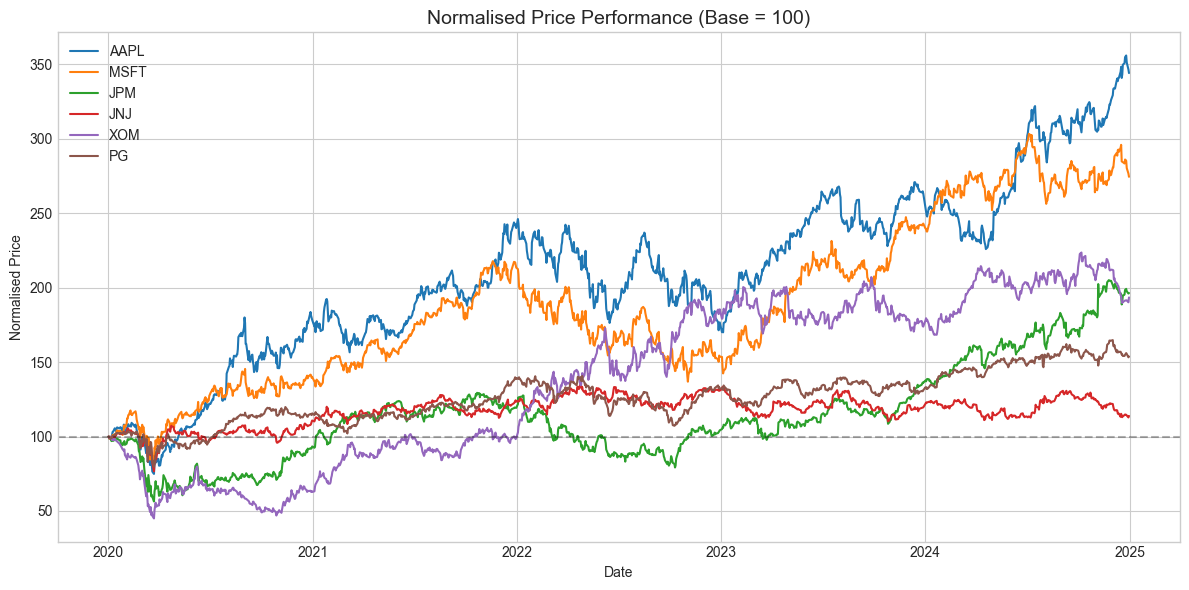

In [35]:
# Normalise prices to start at 100 (like creating an index)
normalised_prices = (prices / prices.iloc[0]) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for ticker in tickers:
    ax.plot(normalised_prices.index, normalised_prices[ticker], label=ticker, linewidth=1.5)

ax.set_title('Normalised Price Performance (Base = 100)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Normalised Price')
ax.legend(loc='upper left')
ax.axhline(y=100, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

Correlations is crucial for portfolio diversification therefore I created a correlation matrix and heatmap.

In [ ]:
correlation_matrix = returns.corr()

print("Correlation Matrix:")
correlation_matrix.round(3)

Correlation Matrix:


Ticker,AAPL,JNJ,JPM,MSFT,PG,XOM
Ticker,,,,,,
AAPL,1.0000,0.3750,0.4140,0.7510,0.4280,0.2880
JNJ,0.3750,1.0000,0.4110,0.3770,0.6180,0.3010
JPM,0.4140,0.4110,1.0000,0.4240,0.3640,0.5720
MSFT,0.7510,0.3770,0.4240,1.0000,0.4510,0.2490
PG,0.4280,0.6180,0.3640,0.4510,1.0000,0.2290
XOM,0.2880,0.3010,0.5720,0.2490,0.2290,1.0000


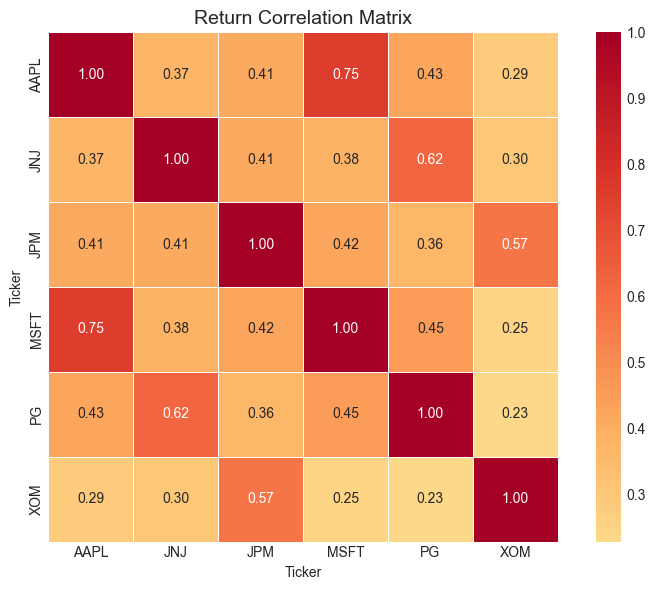

In [37]:
# Create a heatmap - similar to using corrplot in R
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,          # Show values in cells
    fmt='.2f',           # Format to 2 decimal places
    cmap='RdYlBu_r',     # Red-Yellow-Blue colour scheme (reversed)
    center=0,            # Center the colormap at 0
    square=True,         # Make cells square
    linewidths=0.5,
    ax=ax
)

ax.set_title('Return Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

## 8. Return Distribution

Visualisation of the distribution of returns which is important for understanding risk and checking normality assumptions.

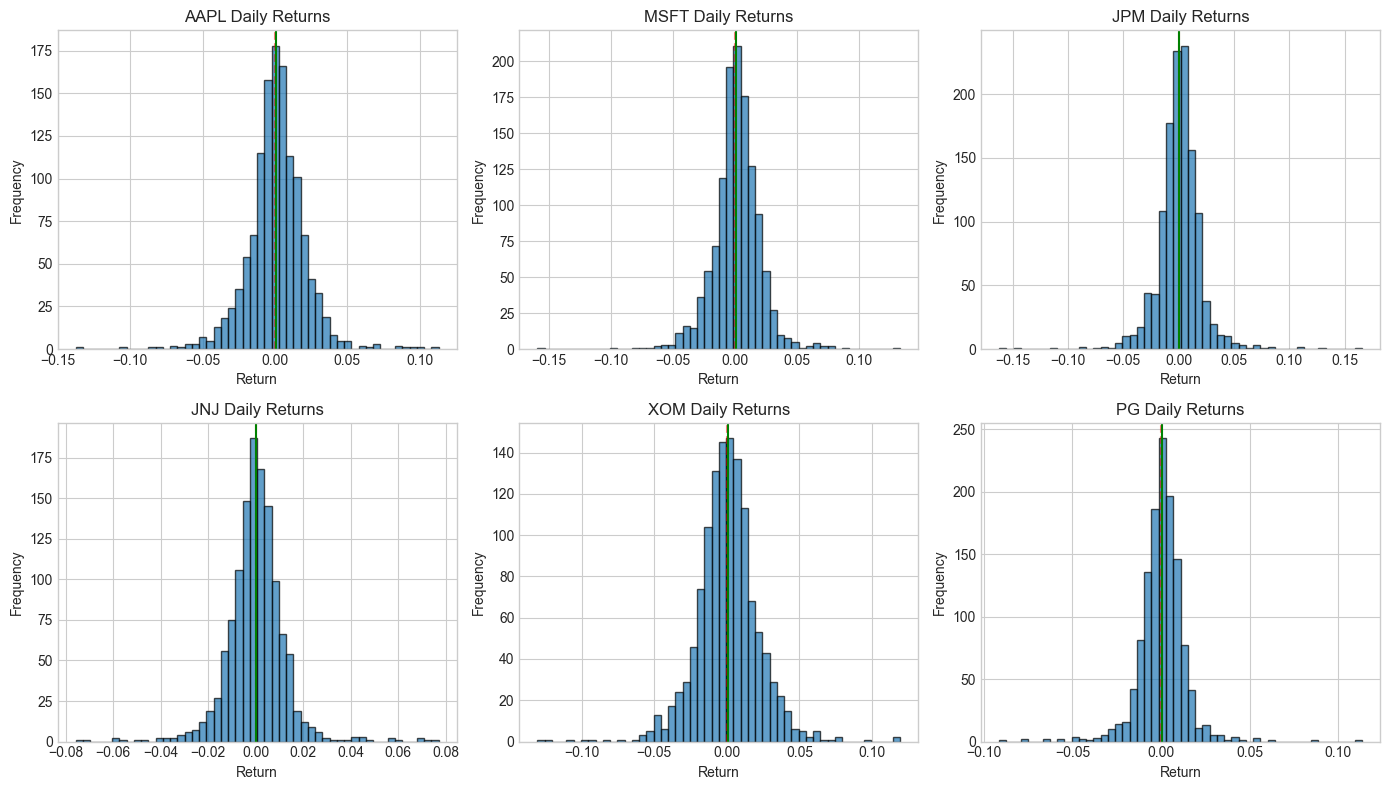

In [ ]:
# Histograms for each stock's returns
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    axes[i].hist(returns[ticker], bins=50, edgecolor='black', alpha=0.7)
    axes[i].axvline(x=0, color='red', linestyle='--', alpha=0.5)
    axes[i].axvline(x=returns[ticker].mean(), color='green', linestyle='-', label='Mean')
    axes[i].set_title(f'{ticker} Daily Returns')
    axes[i].set_xlabel('Return')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 9. Saving the Data 

 Saving my processed data so I can use it in the other notebooks for this project .

In [39]:
# Save to CSV files
prices.to_csv('../outputs/prices.csv')
returns.to_csv('../outputs/returns.csv')
summary_stats.to_csv('../outputs/summary_stats.csv')

print("Data saved to outputs/ folder")
print("- prices.csv")
print("- returns.csv") 
print("- summary_stats.csv")

Data saved to outputs/ folder
- prices.csv
- returns.csv
- summary_stats.csv
